## Process NDVI

In this notebook, previously prepared NDVI data is further processed to retrieve monthly, yearly and spatially aggregated mean NDVI values. The following steps are included:
- Use AVHRR and MODIS NDVI data that has been quality filtered and cropped to NL / BL forest area
- Calculate monthly and yearly mean values for each pixel
- Spatially aggregate NDVI for each federal state to retrieve mean value per state and year

In [1]:
# import libraries
import os
import glob
import xarray as xr
import pandas as pd
import geopandas as gpd
import rasterio
import odc.stac
import pathlib

In [2]:
# set working directory
os.chdir("E:/Master/Thesis/3_Data")
print("Current working directory: {0}".format(os.getcwd()))

Current working directory: E:\Master\Thesis\3_Data


In [3]:
# create list with forest types
forest_types = ("NL", "BL")

In [4]:
# loop over years to calculate monthly and yearly mean ndvi values per pixel
# first, process NDVI from AVHRR data 

for year in range(1981, 2000):
    
    # process needleleaved and broadleaved forest
    for f in range(len(forest_types)):
        forest_type = forest_types[f]

        # get all files of according year that belong to forest type
        directory = f"./NDVI/Daily/{year}"
        filelist = glob.glob(os.path.join(directory, f"*{forest_type}*.nc"))

        # open netCDF dataset of corresponding year with all daily datasets concatenated
        ndvi = xr.open_mfdataset(filelist, concat_dim="time", combine="nested", engine="netcdf4")

        # calculate monthly mean values
        ndvi_mon_mean = ndvi.resample(time="1MS", skipna=True).mean("time")

        # calculate yearly mean values
        ndvi_year_mean = ndvi.resample(time="1YS", skipna=True).mean("time")

        # save created datasets as netCDF4 files
        ndvi_mon_mean.to_netcdf(f"./NDVI/Monthly/NDVI_mon_mean_{year}_{forest_type}.nc")
        ndvi_year_mean.to_netcdf(f"./NDVI/Yearly/NDVI_year_mean_{year}_{forest_type}.nc")

In [4]:
# then, process NDVI from MODIS data 

for year in range(2000, 2025):
    
    # process needleleaved and broadleaved forest
    for f in range(len(forest_types)):
        forest_type = forest_types[f]

        # get all files of according year that belong to forest type
        directory = f"./NDVI/16Daily/{year}"
        filelist = glob.glob(os.path.join(directory, f"*{forest_type}*.nc"))

        # open netCDF dataset of corresponding year with all daily datasets concatenated
        ndvi = xr.open_mfdataset(filelist, concat_dim="time", combine="nested", engine="netcdf4")

        # calculate monthly mean values
        ndvi_mon_mean = ndvi.resample(time="1MS", skipna=True).mean("time")

        # calculate yearly mean values
        ndvi_year_mean = ndvi.resample(time="1YS", skipna=True).mean("time")

        # save created datasets as netCDF4 files
        ndvi_mon_mean.to_netcdf(f"./NDVI/Monthly/NDVI_mon_mean_{year}_{forest_type}.nc")
        ndvi_year_mean.to_netcdf(f"./NDVI/Yearly/NDVI_year_mean_{year}_{forest_type}.nc")

In [5]:
# look at exemplary datasets to get an overview
ndvi_mon_mean

<xarray.Dataset> Size: 995MB
Dimensions:      (time: 12, lat: 2952, lon: 3510)
Coordinates:
    crs          int8 1B -127
    spatial_ref  int64 8B 0
  * lon          (lon) float64 28kB 5.451 5.454 5.457 5.46 ... 15.19 15.2 15.2
  * lat          (lat) float64 24kB 55.2 55.2 55.19 55.19 ... 47.01 47.0 47.0
  * time         (time) datetime64[ns] 96B 2024-01-01 2024-02-01 ... 2024-12-01
Data variables:
    NDVI         (time, lat, lon) float64 995MB dask.array<chunksize=(1, 2952, 3510), meta=np.ndarray>

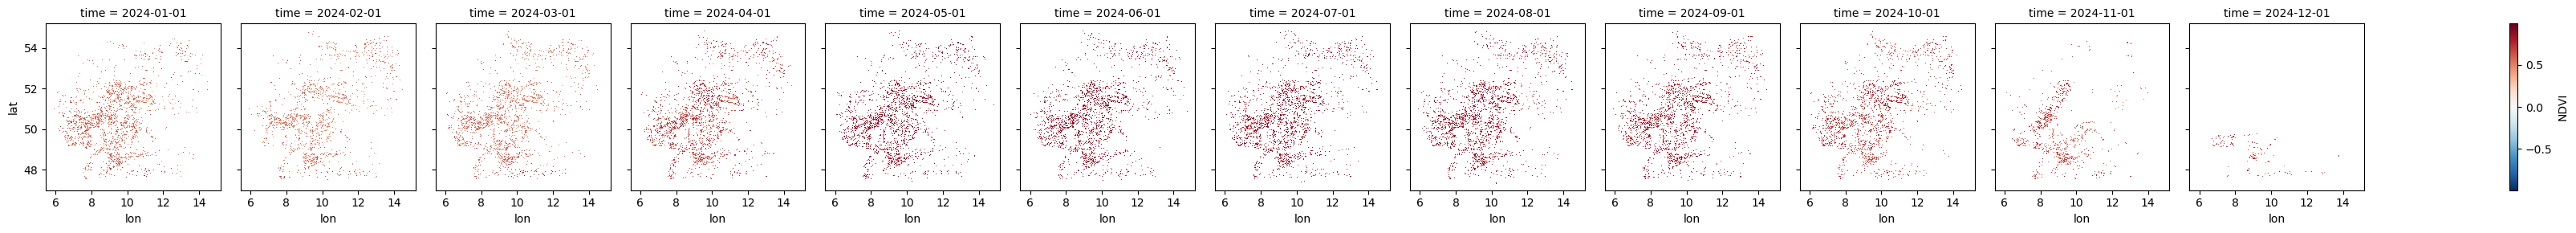

In [6]:
ndvi_mon_mean.NDVI.sel(time = slice('2024-01', '2024-12')).plot(col="time")

In [7]:
ndvi_year_mean

<xarray.Dataset> Size: 83MB
Dimensions:      (time: 1, lat: 2952, lon: 3510)
Coordinates:
    crs          int8 1B -127
    spatial_ref  int64 8B 0
  * lon          (lon) float64 28kB 5.451 5.454 5.457 5.46 ... 15.19 15.2 15.2
  * lat          (lat) float64 24kB 55.2 55.2 55.19 55.19 ... 47.01 47.0 47.0
  * time         (time) datetime64[ns] 8B 2024-01-01
Data variables:
    NDVI         (time, lat, lon) float64 83MB dask.array<chunksize=(1, 2952, 3510), meta=np.ndarray>

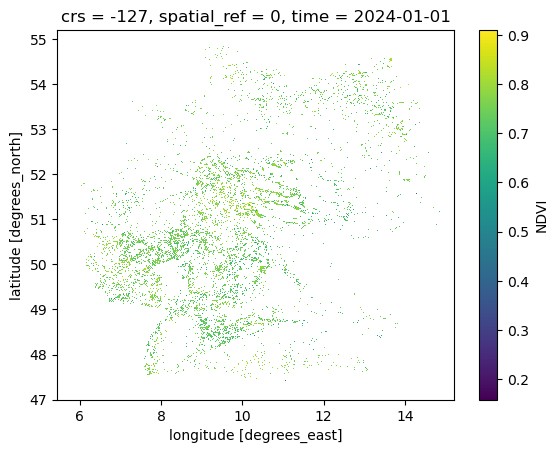

In [8]:
ndvi_year_mean.NDVI.plot()

In [9]:
# spatially aggregate yearly ndvi data
# to get mean values for Germany and federal states

In [10]:
# first, get values for broadleaved forest
# load all yearly ndvi values as one dataset
directory = f"./NDVI/Yearly"
filelist = glob.glob(os.path.join(directory, "*BL*.nc"))
ndvi_yearly = xr.open_mfdataset(filelist, concat_dim="time", combine="nested", engine="netcdf4")

In [11]:
# calculate mean ndvi values per year for Germany
ndvi_yearly_spatial_means = ndvi_yearly.mean(['lon','lat'], skipna=True).to_dataframe()
ndvi_yearly_spatial_means

,NDVI,crs,spatial_ref
time,,,
1981-01-01,0.453743,0,0
1982-01-01,0.417460,0,0
1983-01-01,0.439842,0,0
1984-01-01,0.447806,0,0
1985-01-01,0.481669,0,0
1986-01-01,0.478480,0,0
1987-01-01,0.491443,0,0
1988-01-01,0.455067,0,0
1989-01-01,0.454901,0,0


In [12]:
# drop unneeded columns
ndvi_yearly_spatial_means = ndvi_yearly_spatial_means.drop(['crs', 'spatial_ref'], axis=1)

In [13]:
# rename column with NDVI value to show area
ndvi_yearly_spatial_means.rename({"NDVI":"GER"}, axis=1, inplace=True)

In [14]:
# now, calculate yearly mean ndvi values for all federal states
# get list of shapefiles of all states
directory = "./Administrative_Borders"
files = list(pathlib.Path(directory).glob('*.shp'))

# loop over filelist to process each state
for f in range(len(files)):
    file = files[f]

    # load state shapefile 
    state = str(file)[23:25]
    state_shp = gpd.read_file(file)

    # reproject shapefile to match netcdf data
    state_shp = state_shp.to_crs(4326)

    # extract one date to create mask of state with dimensions of data
    ndvi_ex = ndvi_yearly.sel(time = "1999-01-01", method = "nearest")

    # create mask of research area using the dimensions of the exemplary data
    state_mask = rasterio.features.geometry_mask(state_shp.geometry, 
                                                out_shape=ndvi_ex.odc.geobox.shape,
                                                transform=ndvi_ex.odc.geobox.affine,
                                                all_touched=False,
                                                invert=False)
    
    state_mask = xr.DataArray(state_mask, dims=("lat", "lon"))

    # mask yearly ndvi data
    ndvi_state = ndvi_yearly["NDVI"].where(~state_mask)

    # calculate yearly mean ndvi of state and extract to dataframe
    ndvi_state_spatial_means = ndvi_state.mean(['lon','lat'], skipna=True).to_dataframe()

    # drop unneeded columns
    ndvi_state_spatial_means = ndvi_state_spatial_means.drop(['crs', 'spatial_ref'], axis=1)

    # add yearly mean ndvi values of state to dataframe
    ndvi_yearly_spatial_means[state] = ndvi_state_spatial_means["NDVI"]   

c:\Users\irish\miniconda3\envs\Thesis_Msc\Lib\site-packages\pyogrio\core.py:35: RuntimeWarning: Could not detect GDAL data files.  Set GDAL_DATA environment variable to the correct path.
  _init_gdal_data()
c:\Users\irish\miniconda3\envs\Thesis_Msc\Lib\site-packages\pyogrio\core.py:36: RuntimeWarning: Could not detect PROJ data files.  Set PROJ_LIB environment variable to the correct path.
  _init_proj_data()
c:\Users\irish\miniconda3\envs\Thesis_Msc\Lib\site-packages\odc\geo\_xr_interop.py:632: UserWarning: Multiple CRS coordinates are present
  warnings.warn("Multiple CRS coordinates are present")
c:\Users\irish\miniconda3\envs\Thesis_Msc\Lib\site-packages\odc\geo\_xr_interop.py:632: UserWarning: Multiple CRS coordinates are present
  warnings.warn("Multiple CRS coordinates are present")
c:\Users\irish\miniconda3\envs\Thesis_Msc\Lib\site-packages\odc\geo\_xr_interop.py:632: UserWarning: Multiple CRS coordinates are present
  warnings.warn("Multiple CRS coordinates are present")
c:\Us

In [15]:
ndvi_yearly_spatial_means

,GER,BB,BE,BW,BY,HB,HE,HH,MV,NI,NW,RP,SH,SL,SN,ST,TH
time,,,,,,,,,,,,,,,,,
1981-01-01,0.453743,0.436518,0.361370,0.487247,0.476077,0.440583,0.459041,0.363649,0.429798,0.412398,0.447574,0.472036,0.425012,0.436047,0.398323,0.378465,0.439684
1982-01-01,0.417460,0.366398,0.296197,0.451846,0.444555,0.413698,0.411058,0.373504,0.425866,0.405545,0.417241,0.422530,0.467435,0.412551,0.348230,0.324572,0.359159
1983-01-01,0.439842,0.434064,0.383984,0.457322,0.456555,0.445508,0.438803,0.401512,0.447568,0.419210,0.439648,0.440135,0.472251,0.421265,0.398388,0.390052,0.417878
1984-01-01,0.447806,0.376815,0.311527,0.483285,0.480754,0.356510,0.449219,0.371759,0.407310,0.403992,0.452388,0.469720,0.447479,0.438099,0.390990,0.366497,0.426989
1985-01-01,0.481669,0.451869,0.361211,0.491532,0.499516,0.511795,0.489895,0.490817,0.482306,0.451879,0.486745,0.488617,0.513404,0.477025,0.440228,0.432227,0.454476
1986-01-01,0.478480,0.436317,0.323132,0.506376,0.463322,0.523559,0.495710,0.459156,0.469575,0.463020,0.500772,0.484209,0.491558,0.497661,0.395722,0.402622,0.444474
1987-01-01,0.491443,0.425283,0.334602,0.503467,0.522586,0.516582,0.485600,0.416842,0.473570,0.470913,0.482860,0.503759,0.469160,0.522853,0.426151,0.460386,0.506105
1988-01-01,0.455067,0.382279,0.318641,0.493378,0.484846,0.436653,0.460105,0.379198,0.387884,0.436563,0.456239,0.466435,0.432708,0.475041,0.391422,0.380203,0.440023
1989-01-01,0.454901,0.411792,0.309773,0.445785,0.470416,0.439257,0.475046,0.443100,0.454385,0.436440,0.451638,0.481772,0.515858,0.457045,0.367117,0.382718,0.410927


In [16]:
# save as csv dataset
ndvi_yearly_spatial_means.to_csv("./Tables/Spatial_Means/NDVI_Yearly_Spatial_Means_BL.csv")

In [17]:
# now take the same steps for needleleaved forest
# load all yearly ndvi values as one dataset
directory = f"./NDVI/Yearly"
filelist = glob.glob(os.path.join(directory, "*NL*.nc"))
ndvi_yearly = xr.open_mfdataset(filelist, concat_dim="time", combine="nested", engine="netcdf4")

In [18]:
# calculate mean ndvi values per year for Germany
ndvi_yearly_spatial_means = ndvi_yearly.mean(['lon','lat'], skipna=True).to_dataframe()

In [19]:
# drop unneeded columns
ndvi_yearly_spatial_means = ndvi_yearly_spatial_means.drop(['crs', 'spatial_ref'], axis=1)

In [20]:
# rename column with NDVI value to show area
ndvi_yearly_spatial_means.rename({"NDVI":"GER"}, axis=1, inplace=True)

In [21]:
# now, calculate yearly mean ndvi values for all federal states
# get list of shapefiles of all states
directory = "./Administrative_Borders"
files = list(pathlib.Path(directory).glob('*.shp'))

# loop over filelist to process each state
for f in range(len(files)):
    file = files[f]

    # load state shapefile 
    state = str(file)[23:25]
    state_shp = gpd.read_file(file)

    # reproject shapefile to match netcdf data
    state_shp = state_shp.to_crs(4326)

    # extract one date to create mask of state with dimensions of data
    ndvi_ex = ndvi_yearly.sel(time = "1999-01-01", method = "nearest")

    # create mask of research area using the dimensions of the exemplary data
    state_mask = rasterio.features.geometry_mask(state_shp.geometry, 
                                                out_shape=ndvi_ex.odc.geobox.shape,
                                                transform=ndvi_ex.odc.geobox.affine,
                                                all_touched=False,
                                                invert=False)
    
    state_mask = xr.DataArray(state_mask, dims=("lat", "lon"))

    # mask yearly ndvi data
    ndvi_state = ndvi_yearly["NDVI"].where(~state_mask)

    # calculate yearly mean ndvi of state and extract to dataframe
    ndvi_state_spatial_means = ndvi_state.mean(['lon','lat'], skipna=True).to_dataframe()

    # drop unneeded columns
    ndvi_state_spatial_means = ndvi_state_spatial_means.drop(['crs', 'spatial_ref'], axis=1)

    # add yearly mean ndvi values of state to dataframe
    ndvi_yearly_spatial_means[state] = ndvi_state_spatial_means["NDVI"]   

c:\Users\irish\miniconda3\envs\Thesis_Msc\Lib\site-packages\odc\geo\_xr_interop.py:632: UserWarning: Multiple CRS coordinates are present
  warnings.warn("Multiple CRS coordinates are present")
c:\Users\irish\miniconda3\envs\Thesis_Msc\Lib\site-packages\odc\geo\_xr_interop.py:632: UserWarning: Multiple CRS coordinates are present
  warnings.warn("Multiple CRS coordinates are present")
c:\Users\irish\miniconda3\envs\Thesis_Msc\Lib\site-packages\odc\geo\_xr_interop.py:632: UserWarning: Multiple CRS coordinates are present
  warnings.warn("Multiple CRS coordinates are present")
c:\Users\irish\miniconda3\envs\Thesis_Msc\Lib\site-packages\odc\geo\_xr_interop.py:632: UserWarning: Multiple CRS coordinates are present
  warnings.warn("Multiple CRS coordinates are present")
c:\Users\irish\miniconda3\envs\Thesis_Msc\Lib\site-packages\odc\geo\_xr_interop.py:632: UserWarning: Multiple CRS coordinates are present
  warnings.warn("Multiple CRS coordinates are present")
c:\Users\irish\miniconda3\envs

In [22]:
ndvi_yearly_spatial_means

,GER,BB,BE,BW,BY,HB,HE,HH,MV,NI,NW,RP,SH,SL,SN,ST,TH
time,,,,,,,,,,,,,,,,,
1981-01-01,0.465270,0.432163,0.380566,0.555480,0.491057,0.440283,0.476242,0.376283,0.437995,0.428021,0.501953,0.505165,0.439455,0.405655,0.418963,0.409918,0.454692
1982-01-01,0.425331,0.376261,0.327420,0.514127,0.452042,0.424291,0.422305,0.333391,0.416104,0.421873,0.460387,0.446180,0.462493,0.426718,0.367462,0.365363,0.410491
1983-01-01,0.459092,0.448683,0.405692,0.510972,0.466126,0.425205,0.448114,0.361666,0.469097,0.452280,0.491613,0.465925,0.484109,0.425734,0.408990,0.423280,0.444507
1984-01-01,0.450320,0.390016,0.339407,0.538541,0.489164,0.372369,0.463704,0.336916,0.407114,0.413832,0.504330,0.491802,0.443081,0.438131,0.403867,0.374144,0.473013
1985-01-01,0.486375,0.451637,0.388078,0.526216,0.502894,0.480735,0.496465,0.447504,0.481730,0.482019,0.539502,0.501282,0.526849,0.480942,0.451721,0.444598,0.477180
1986-01-01,0.482902,0.449040,0.364745,0.553126,0.480231,0.477351,0.504155,0.429915,0.486736,0.501479,0.554651,0.505825,0.491450,0.479247,0.409914,0.441398,0.472695
1987-01-01,0.486266,0.435524,0.377106,0.538479,0.512394,0.492254,0.501251,0.395236,0.465113,0.485266,0.506267,0.510410,0.474096,0.522106,0.430016,0.452943,0.522271
1988-01-01,0.459539,0.399511,0.343784,0.544617,0.492879,0.437329,0.480441,0.347379,0.395487,0.439869,0.513367,0.488225,0.437427,0.457746,0.412644,0.392640,0.488901
1989-01-01,0.457031,0.412072,0.341622,0.509700,0.476579,0.459174,0.482806,0.408377,0.451619,0.462927,0.494427,0.505435,0.511472,0.467610,0.406340,0.401071,0.449461


In [23]:
# save as csv dataset
ndvi_yearly_spatial_means.to_csv("./Tables/Spatial_Means/NDVI_Yearly_Spatial_Means_NL.csv")